In [ ]:
# Project objectif

In [1]:
# load data
import pandas as pd
data = pd.read_csv('.\movie_data.csv')
data.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [2]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null int64
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


Data Visualization: 

* 1. Data Distribution - Is the dataset balanced ?
* 2. Wordcloud and Histogram (seaborn) - Most common words & Noise words

# Data Distribution

In [3]:
# Data distribution
df = data.sentiment.value_counts()
df.index = ['Pos','Neg']
df.columns = ['sentiment']
df.plot.bar(x = 'sentiment',rot = 360)

The number of positive reviews is equal to the number of negative reviews

# Common words
## WordCloud and Histogram

WordCloud allows you to obtain interactive feedback from text.  

The more a word (or phrase) is submitted, the larger it is displayed.



In [4]:
def plot_word_cloud(data, max_words = 300,background_color = 'black',language = 'english',stopwords = None):
    '''
    data: dataframe text column 
    most common words presented by wordcloud
    a user defined stopwords list can be used 
    
    '''
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    %matplotlib inline
    text = str(data.values)
    if stopwords == None: # by defaut use nltk.corpus stopwords
        from nltk.corpus import stopwords
        sw = set(stopwords.words(language))
    else: # user defined stopwords
        sw = set(stopwords)

        
    wc = WordCloud(background_color=background_color, max_words = max_words,
                  stopwords=sw, max_font_size=50, random_state=42)
    plt.figure(figsize =(20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()
    

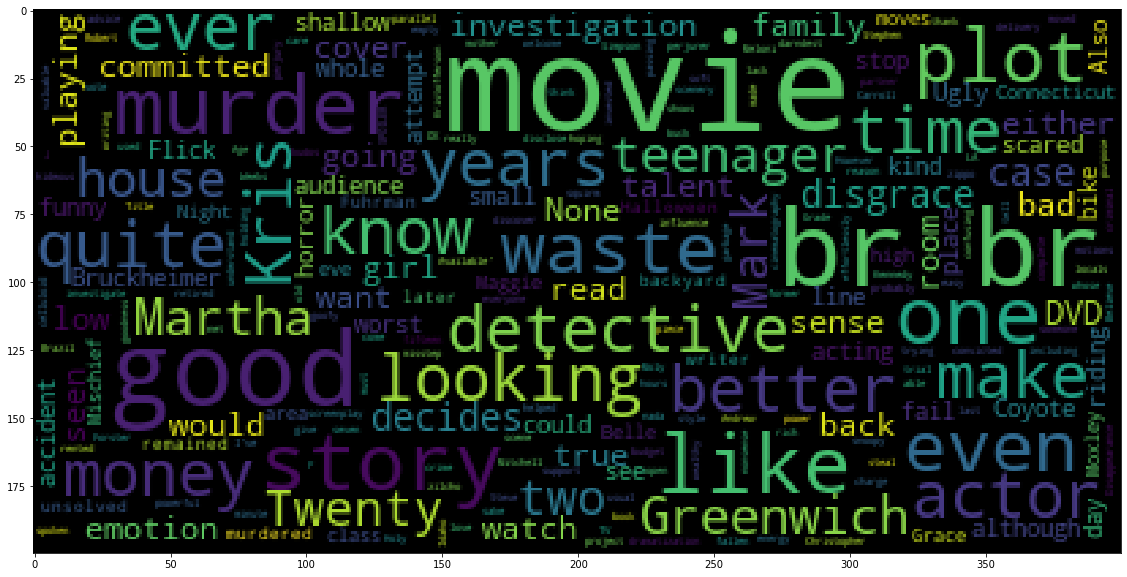

In [5]:
plot_word_cloud(data['review'])

We could not see too much accrative informations from this figure, because there are still noise words like 'br', 'dvd', 'movie' 'would','could' and so on. 
But it may give us a clue about how adjusting stop words list
The figure below uses a user defined stop words list.
And the result is better than the last wordcloud

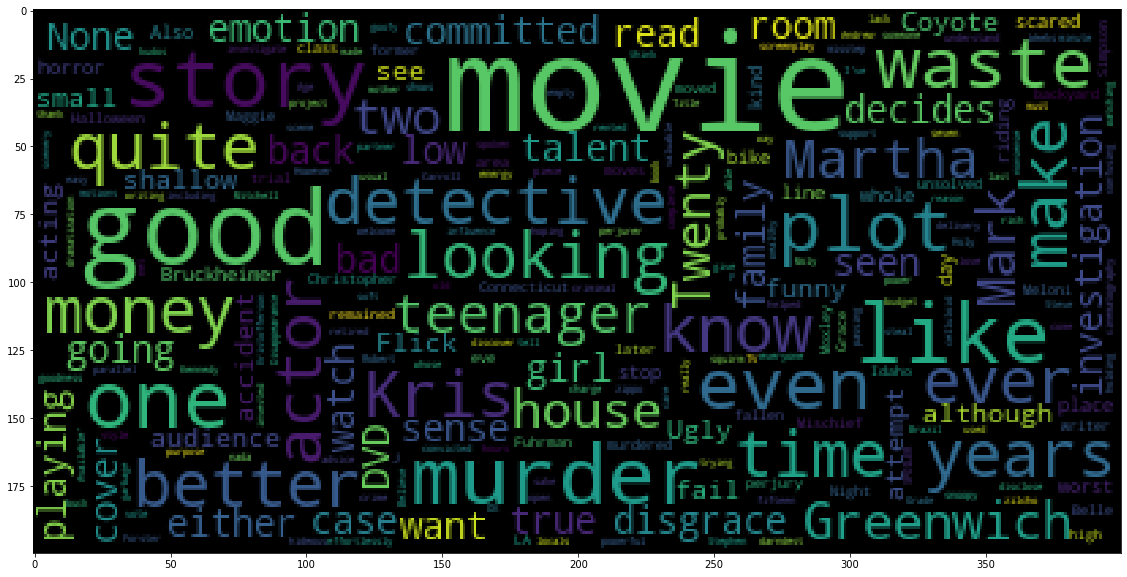

In [6]:
# demo with user defined stopwords list
from nltk.corpus import stopwords
user_defined = ['would','could','br']
sw = stopwords.words('english')+user_defined
plot_word_cloud(data.review,stopwords=sw)

Another way to visualize the most frequently used words by internet users is to create a histogram indicating the number of times the word has been used.

In [7]:
def word_freq_counter(data,most_common=20):
    '''
    data: a dataframe text column
    to present the most common words in the text by barplot
    and return a dict 
    '''
    from collections import Counter
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    chaine = str(data.values).lower()
    
    dico = Counter(chaine.split())
    words = [d[0] for d in dico.most_common(most_common)]
    freq = [d[1] for d in dico.most_common(most_common) ]

    plt.figure(figsize = (10,6))
    sns.barplot(x = words, y = freq)
    plt.title(str(most_common) +' most frequency words')
     
    dic = dico.most_common(most_common)
    return dic


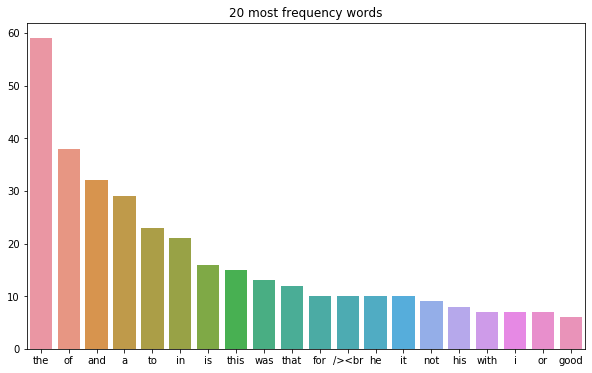

In [8]:
common_words = word_freq_counter(data.review)

In [9]:
print(common_words)

[('the', 59), ('of', 38), ('and', 32), ('a', 29), ('to', 23), ('in', 21), ('is', 16), ('this', 15), ('was', 13), ('that', 12), ('for', 10), ('/><br', 10), ('he', 10), ('it', 10), ('not', 9), ('his', 8), ('with', 7), ('i', 7), ('or', 7), ('good', 6)]


With word_freq_counter() we could list the most common words in the dataframe text column, and use this words to complet stop word list in order to move 'noise' in dataset

Data Preparation / Data Cleaning 
1. Data cleaning 

    remove symbols like ... , < , > and so on
    
    
2. Tokenization + removing stop words + stop words update
3. 

In [10]:
# covert all text to lowercase 
data.loc[:,'review'] = data['review'].apply(str.lower)
data.head(2)

,review,sentiment
0,"in 1974, the teenager martha moxley (maggie gr...",1
1,ok... so... i really like kris kristofferson a...,0


In [11]:
# data cleaning - 1.1 keep words, number and emotions (":)", ":(")
 
def processor(text):
    '''
    keep the words, numbers and emotions
    
    '''
    import re
    text = re.compile(r'<[^>]*>|[\W]+').sub(' ',text)
    emotions = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)').findall(text)
    text = text + ' '.join(emotions).replace('-','')
    text = text.rstrip().strip()
    return text

In [12]:
data['review'] = data['review'].apply(processor)
data.sample(3)

,review,sentiment
192,wow who ever said that edward d wood jr never ...,0
17283,the characters are cliched and predictable wit...,0
46114,robert jordan is a television star robert jord...,1


In [13]:
# stop word filtering 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [14]:
# stop word update 
def stop_words_update(stop_words_org, update_list):
    stop_words_org.update(update_list)
    return stop_words_org

In [15]:
# tokenlization
def token_col(data,text_index):
    '''tokenize the text column and saved in a list'''
    from nltk.tokenize import word_tokenize
    tokens = []
    for i in range(data.shape[0]):
        tokens.append(word_tokenize(data.iloc[i,text_index]))
    return tokens

In [16]:
# stop words filtering 
def stop_words_filtering(words,stop_words):
    no_stop_words = []
    for word in words:
        if word not in stop_words:
            no_stop_words.append(word)
    return no_stop_words

In [17]:
data['tokens'] = token_col(data,0)
data['no_stop_words'] = data['tokens'].apply(lambda x: stop_words_filtering(x, stop_words))
data.head()

,review,sentiment,tokens,no_stop_words
0,in 1974 the teenager martha moxley maggie grac...,1,"[in, 1974, the, teenager, martha, moxley, magg...","[1974, teenager, martha, moxley, maggie, grace..."
1,ok so i really like kris kristofferson and his...,0,"[ok, so, i, really, like, kris, kristofferson,...","[ok, really, like, kris, kristofferson, usual,..."
2,spoiler do not read this if you think about wa...,0,"[spoiler, do, not, read, this, if, you, think,...","[spoiler, read, think, watching, movie, althou..."
3,hi for all the people who have seen this wonde...,1,"[hi, for, all, the, people, who, have, seen, t...","[hi, people, seen, wonderful, movie, im, sure,..."
4,i recently bought the dvd forgetting just how ...,0,"[i, recently, bought, the, dvd, forgetting, ju...","[recently, bought, dvd, forgetting, much, hate..."


[("'br',", 20),
 ("'movie',", 13),
 ("'good',", 9),
 ("'murder',", 5),
 ("'story',", 5),
 ("'like',", 5),
 ("'one',", 5),
 ("'movies',", 4),
 ("'plot',", 4),
 ("'waste',", 4)]

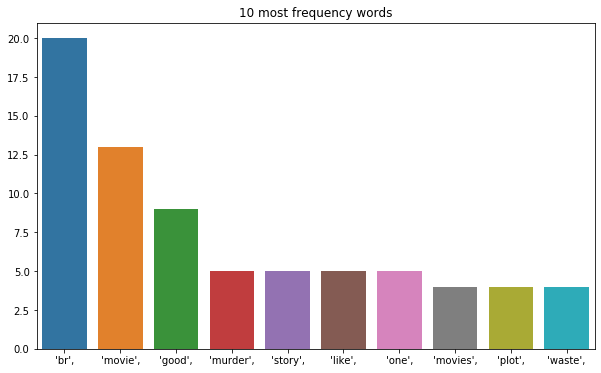

In [18]:
word_freq_counter(data['no_stop_words'],10)

In [25]:
update = ['br','movie','movies','could','would']
stop_words = stop_words_update(stop_words,update)
# save the stop words to excel 
stop_words_df = pd.DataFrame({"stop_words": list(stop_words)})
sw_file_name = 'stop_words_list.xlsx'
stop_words_df.to_excel(sw_file_name, index = False)
# the update can be done by modify excel also

In [23]:
# update "no stop words" with the updated list
data.loc[:,'no_stop_words'] = data['no_stop_words'].apply(lambda x: stop_words_filtering(x, stop_words))
data.head(3)

,review,sentiment,tokens,no_stop_words
0,in 1974 the teenager martha moxley maggie grac...,1,"[in, 1974, the, teenager, martha, moxley, magg...","[1974, teenager, martha, moxley, maggie, grace..."
1,ok so i really like kris kristofferson and his...,0,"[ok, so, i, really, like, kris, kristofferson,...","[ok, really, like, kris, kristofferson, usual,..."
2,spoiler do not read this if you think about wa...,0,"[spoiler, do, not, read, this, if, you, think,...","[spoiler, read, think, watching, although, was..."


[("'good',", 9),
 ("'murder',", 5),
 ("'story',", 5),
 ("'like',", 5),
 ("'one',", 5),
 ("'plot',", 4),
 ("'waste',", 4),
 ("'years',", 3),
 ("'detective',", 3),
 ("'money',", 3)]

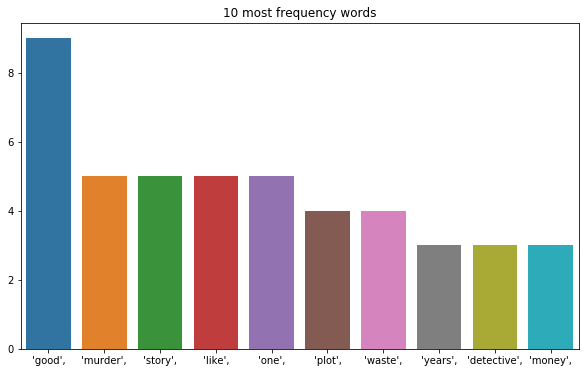

In [24]:
word_freq_counter(data['no_stop_words'],10)

It seems like the OK for now. We may update the stop words list if needed.

# MODELS
In Jupyter only bag of words 

In [30]:
# Use Bag of words (CountVectorizer) 
def count_vector_model(data, feature, target, stopwords,test_size, random_state):
    '''
    data: source dataframe
    return: vectorizer, X_train, X_test, y_train, y_test
    '''
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    
    X = data[feature]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,
                                                       random_state=random_state)
    
    vectorizer = CountVectorizer(stop_words=stopwords, 
                                 token_pattern=r'[a-zA-Z]{2,}') 
    #keep words with two or more letters
    X_train= vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    return vectorizer, X_train, X_test, y_train, y_test

In [31]:
vectorizer,X_train, X_test, y_train, y_test = count_vector_model(data, 'review','sentiment',
                                                                 stopwords=stop_words,test_size=0.4,random_state=20)

In [32]:
# using Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1,random_state=2).fit(X_train, y_train)
y_pred= clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, 
                               rownames= ['real sentiment'], 
                               colnames=['prediected sentiment'])
confusion_matrix

prediected sentiment,0,1
real sentiment,,
0,8062,1896
1,1502,8540


In [38]:
score_clf = clf.score(X_test, y_test)
print('Gradient Boosting Classifer with Bag of words model score: {:.4f}'.format(score_clf))

Gradient Boosting Classifer with Bag of words model score: 0.8301


In [39]:
from sklearn.metrics import classification_report
report_clf = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report_clf)

,0,1,accuracy,macro avg,weighted avg
precision,0.842953,0.818321,0.8301,0.830637,0.830585
recall,0.809600,0.850428,0.8301,0.830014,0.830100
f1-score,0.825940,0.834066,0.8301,0.830003,0.830020
support,9958.000000,10042.000000,0.8301,20000.000000,20000.000000


In [44]:
# using BernoulliNB
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB()
ber.fit(X_train, y_train)
y_pred= ber.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, 
                               rownames= ['real sentiment'], 
                               colnames=['prediected sentiment'])
confusion_matrix

prediected sentiment,0,1
real sentiment,,
0,8846,1112
1,2009,8033


In [45]:
score_ber = ber.score(X_test, y_test)
print('BernoulliNB with Bag of words model score: {:.4f}'.format(score_ber))

BernoulliNB with Bag of words model score: 0.8439


In [46]:
report_ber = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report_ber)

,0,1,accuracy,macro avg,weighted avg
precision,0.814924,0.878403,0.84395,0.846664,0.846797
recall,0.888331,0.799940,0.84395,0.844136,0.843950
f1-score,0.850046,0.837338,0.84395,0.843692,0.843665
support,9958.000000,10042.000000,0.84395,20000.000000,20000.000000
